# MS365 Assignment 4
# Name:
Due: 2024-02-22 12:45 pm
---
Rules for the Assignment.

*   Add name to this cell
*   If data already exists in a cell, do not change it as it is going to be used for that question
*   **Run all cells prior to submitting your notebook on canvas**
*   **Any cells with errors will be marked wrong**
*   If you want to test something with other data, you can create a new cell, test, then **delete** the cell
*   The final grade will be based on the original data in the assignment, not data that you created
*   If data does not already exist, then you can create your own based on the requirements of the question
*   Add comments to your code
*   Post questions to canvas discussion forum
*   If there are additional instructions for an exercise, make sure all instructions are followed.

**To submit, download (File -> Download) a copy to your computer and upload it to canvas. Please do not try to share it directly from Google Drive**

---

**If your Google Drive is not linked, run the following cell to link your Google Drive to this notebook**
>There will be pop-up windows verifying your request to link your Google Drive to this notebook. Accept those requests.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Assignment Questions
---


**Question 1 (2 points)**: Import the required libraries needed to fit and evaluate a linear regression model.
You will need:
1. `pandas`
2. `train_test_split` from `sklearn.model_selection`
3. `LinearRegression` from `sklearn.linear_model`
4. `mean_absolute_error` and `mean_squared_error` from `sklearn.metrics`
5. `matplotlib.pyplot`

Set your plot `figure.figsize` to [20, 5]

In [ ]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

**Question 2 (2 points)**: Create a dataframe called `df` from the file `assignment4_data.csv`. Remove the columns named `Latitude` and `Longitude`, using the pandas dataframe method `drop()`. Display the first 15 rows of data from the dataframe.

---
Data Information:

* **Zip Code**: Zip code within which the listing is present.
* **Price**: Listed price for the property.
* **Beds**: Number of beds mentioned in the listing.
* **Baths**: Number of baths mentioned in the listing.
* **Living Space**: The total size of the living space, in square feet, mentioned in the listing.
* **Address**: Street address of the listing.
* **City**: City name where the listing is located.
* **State**: State name where the listing is located.
* **Zip Code Population**: The estimated number of individuals within the zip code. Data from Simplemaps.com.
* **Zip Code Density**: The estimated number of individuals per square mile within the zip code. Data from Simplemaps.com.
* **County**: County where the listing is located.
* **Median Household income**: Estimated median household income. Data from the U.S. Census Bureau.

In [8]:
df = pandas.read_csv("/content/drive/MyDrive/MS365/Assignments/assignment4_data.csv")
df.drop(columns=["Latitude", "Longitude"], inplace=True)
df.head(15)

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0
5,10017,764900.0,1,1,643,145 E 48TH ST APT 11E,New York,New York,15514,20107.7,New York,188289.0
6,10021,2499000.0,2,2,1471,234 E 70TH ST APT 4,New York,New York,42484,46004.0,New York,261254.0
7,10022,4580000.0,2,3,1800,641 5TH AVE # 29D,New York,New York,33303,28998.9,New York,281977.0
8,10026,540000.0,2,1,750,45 CENTRAL PARK N # 4D,New York,New York,39401,39689.7,New York,117438.0
9,10026,570000.0,1,1,589,300 W 110TH ST APT 19H,New York,New York,39401,39689.7,New York,117438.0


**Question 3 (2 points)**:
1. Use the `describe()` dataframe method to determine if you are missing any data. If you are, fill in the missing data with appropriate data and explain in a comment why you chose that data-fill method.
2. Look at the data types of your data in your dataframe. Determine which columns cannot be used for a Multiple Linear Regression model. Remove those columns from your df using the dataframe `drop()` method. Explain why those columns could not be used for this model in a comment.
3. Display the top 15 rows of your dataframe.

**Create new code cells as needed.**

In [11]:
df.describe()

,Zip Code,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income
count,39981.000000,3.998100e+04,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000,39981.000000
mean,64833.391336,6.227771e+05,3.171682,2.466572,1901.522723,37726.201996,2379.412483,110837.259861
std,25614.601116,9.469793e+05,1.308796,1.323042,1211.307257,18672.647445,2946.574792,47307.872382
min,10013.000000,1.800000e+03,1.000000,1.000000,2.000000,0.000000,0.000000,27475.000000
25%,40215.000000,2.650000e+05,3.000000,2.000000,1200.000000,24465.000000,902.400000,76640.000000
50%,74136.000000,3.999000e+05,3.000000,2.000000,1639.000000,35049.000000,1588.700000,100405.000000
75%,85730.000000,6.749900e+05,4.000000,3.000000,2265.000000,46816.000000,2736.800000,135075.000000
max,98199.000000,3.800000e+07,54.000000,66.000000,74340.000000,116469.000000,58289.600000,900203.000000


In [10]:
df["Median Household Income"].fillna(value=df["Median Household Income"].mean(), inplace=True)

In [13]:
df.drop(columns=["Zip Code", "Address", "City", "State", "County"], inplace=True)

In [14]:
df.head(15)

,Price,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income
0,3999000.0,2,3,1967,29563,20967.9,370046.0
1,3999000.0,2,3,1967,29563,20967.9,370046.0
2,1650000.0,1,1,718,29815,23740.9,249880.0
3,760000.0,3,2,1538,29815,23740.9,249880.0
4,1100000.0,1,1,600,29815,23740.9,249880.0
5,764900.0,1,1,643,15514,20107.7,188289.0
6,2499000.0,2,2,1471,42484,46004.0,261254.0
7,4580000.0,2,3,1800,33303,28998.9,281977.0
8,540000.0,2,1,750,39401,39689.7,117438.0
9,570000.0,1,1,589,39401,39689.7,117438.0


**Question 4 (2 points)**:
1. Create a variable called `y_column` and set the value to `Price`, the column we will be trying to predict.
2. Create a list of the x columns named `x_columns`, make sure you do not have the `y_column` value in the `x_columns`.
3. Create a dataframe called `x_data` that contains only the `x_columns` data.
4. Create a variable called `y_data` that contains only the `y_column` data.
5. Print the top 5 rows of `x_data` and `y_data`, separate the two printouts with dashes to better show the different prinouts.

In [20]:
y_column = "Price"
x_columns = list(df.columns)
x_columns.remove(y_column)

x_data = df[x_columns]
y_data = df[y_column]

print(x_data.head())
print("-----")
print(y_data.head())

   Beds  Baths  Living Space  Zip Code Population  Zip Code Density  \
0     2      3          1967                29563           20967.9   
1     2      3          1967                29563           20967.9   
2     1      1           718                29815           23740.9   
3     3      2          1538                29815           23740.9   
4     1      1           600                29815           23740.9   

   Median Household Income  
0                 370046.0  
1                 370046.0  
2                 249880.0  
3                 249880.0  
4                 249880.0  
-----
0    3999000.0
1    3999000.0
2    1650000.0
3     760000.0
4    1100000.0
Name: Price, dtype: float64


**Question 5 (2 points)**: Use the `x_data` and `y_data` from question 4 to create training and testing/validation datasets. Create a `LinearRegression` model and fit the model with the training data.

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.20, random_state=14)

lr = LinearRegression()

lr.fit(x_train, y_train)

LinearRegression()

**Question 6 (2 points)**: Check the Multiple Linear Regression model assumptions.
1. Is there a linear relationship between the `Price` and the different `x_columns` values?
  * Use a scatter plot for each of the values in `x_columns` and `Price` to show this.
2. Do any of the columns show multicollinearity?
  * `corr()`
3. Do the data show homoscedasticity?
  * Plot the difference between the `y_estimates` and the `y_test` values in a scatter plot. If there is a funnel or cone shape, it does.

**Summarize the results of your assumption check in a comment. Will the results be reliable for future data use?**

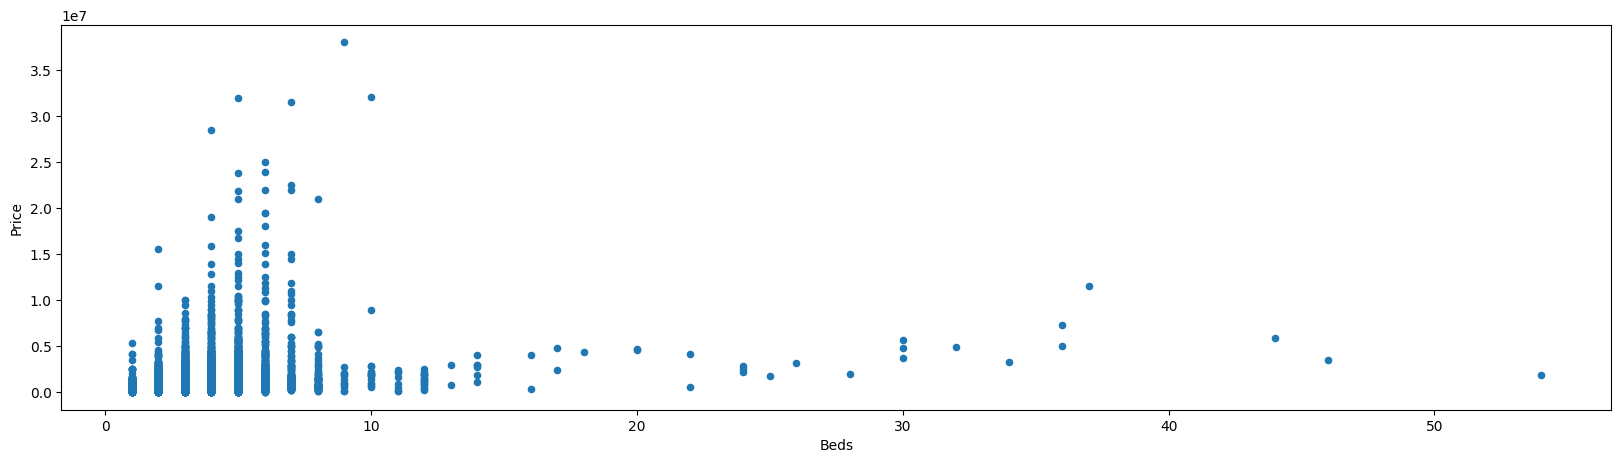

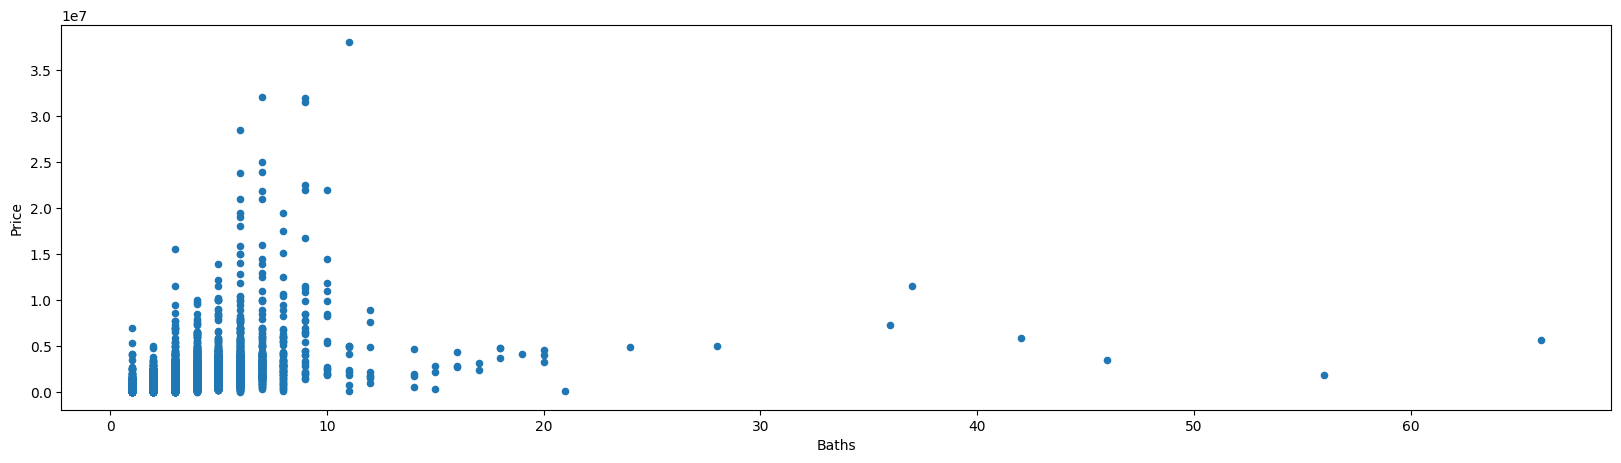

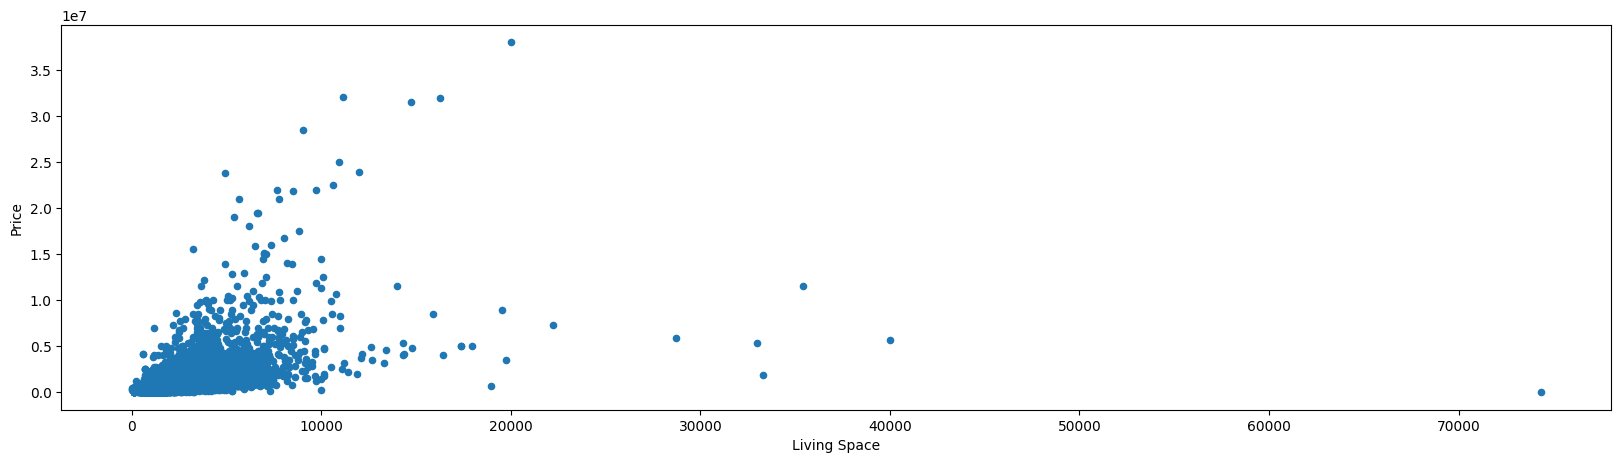

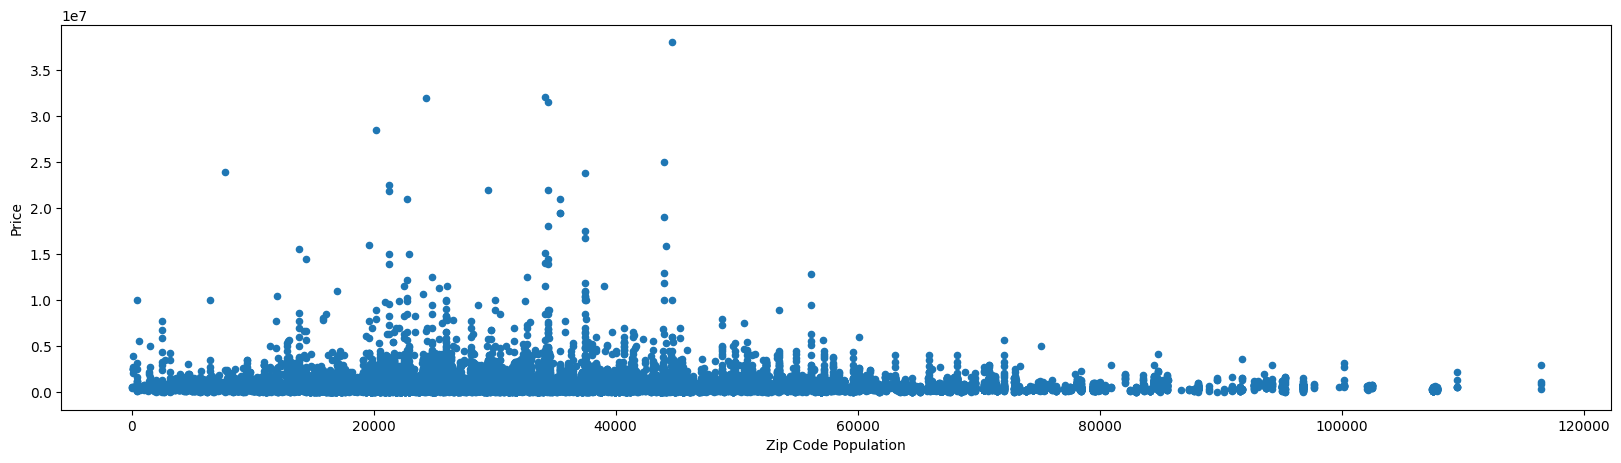

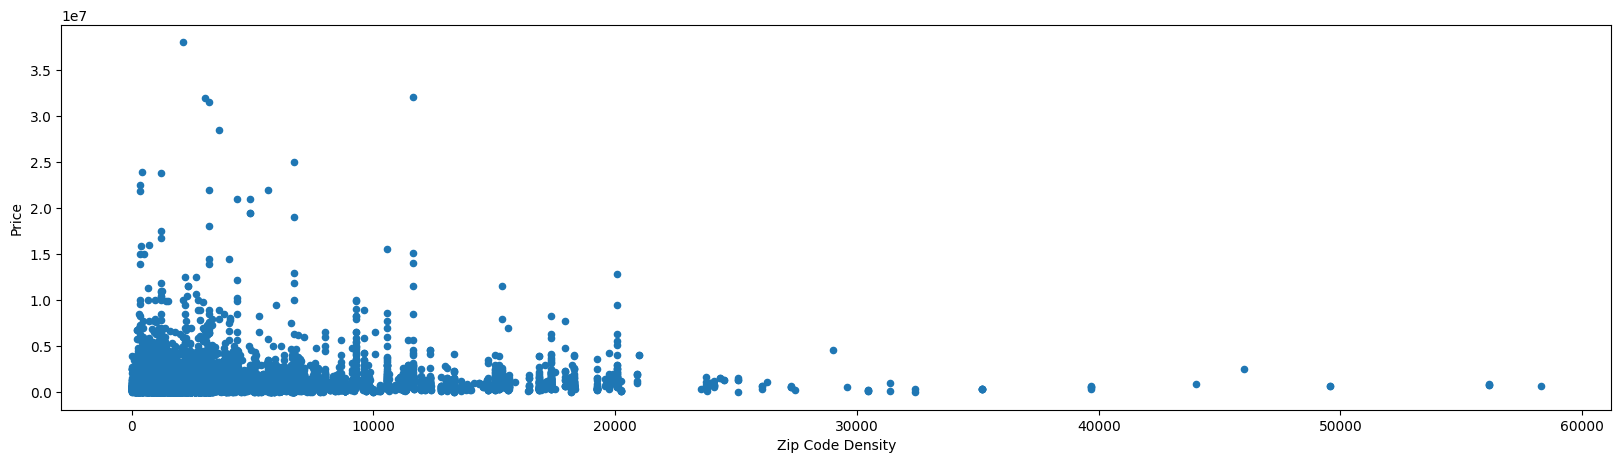

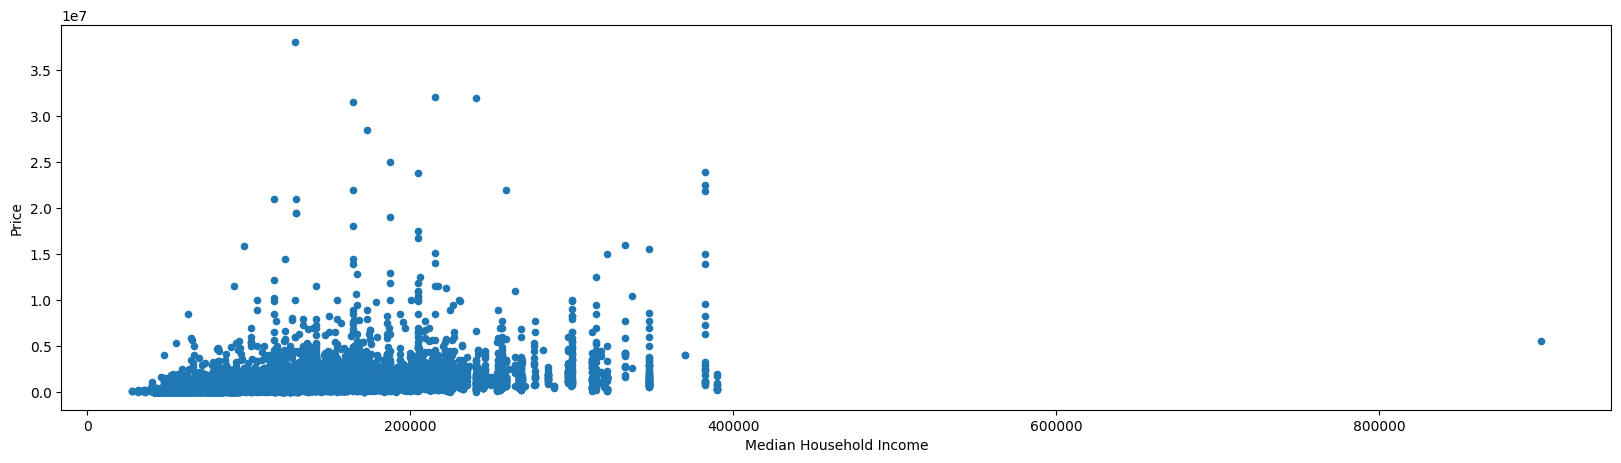

In [26]:
df.plot.scatter(x="Beds", y="Price")
df.plot.scatter(x="Baths", y="Price")
df.plot.scatter(x="Living Space", y="Price")
df.plot.scatter(x="Zip Code Population", y="Price")
df.plot.scatter(x="Zip Code Density", y="Price")
df.plot.scatter(x="Median Household Income", y="Price")
plt.show()

In [27]:
x_data.corr()

,Beds,Baths,Living Space,Zip Code Population,Zip Code Density,Median Household Income
Beds,1.000000,0.703425,0.655098,0.069366,-0.131888,0.014458
Baths,0.703425,1.000000,0.769079,0.001957,-0.068164,0.226424
Living Space,0.655098,0.769079,1.000000,-0.042956,-0.103706,0.222992
Zip Code Population,0.069366,0.001957,-0.042956,1.000000,0.112308,-0.125348
Zip Code Density,-0.131888,-0.068164,-0.103706,0.112308,1.000000,0.175195
Median Household Income,0.014458,0.226424,0.222992,-0.125348,0.175195,1.000000


In [29]:
y_estimates = lr.predict(x_test)
residuals = y_test - y_estimates

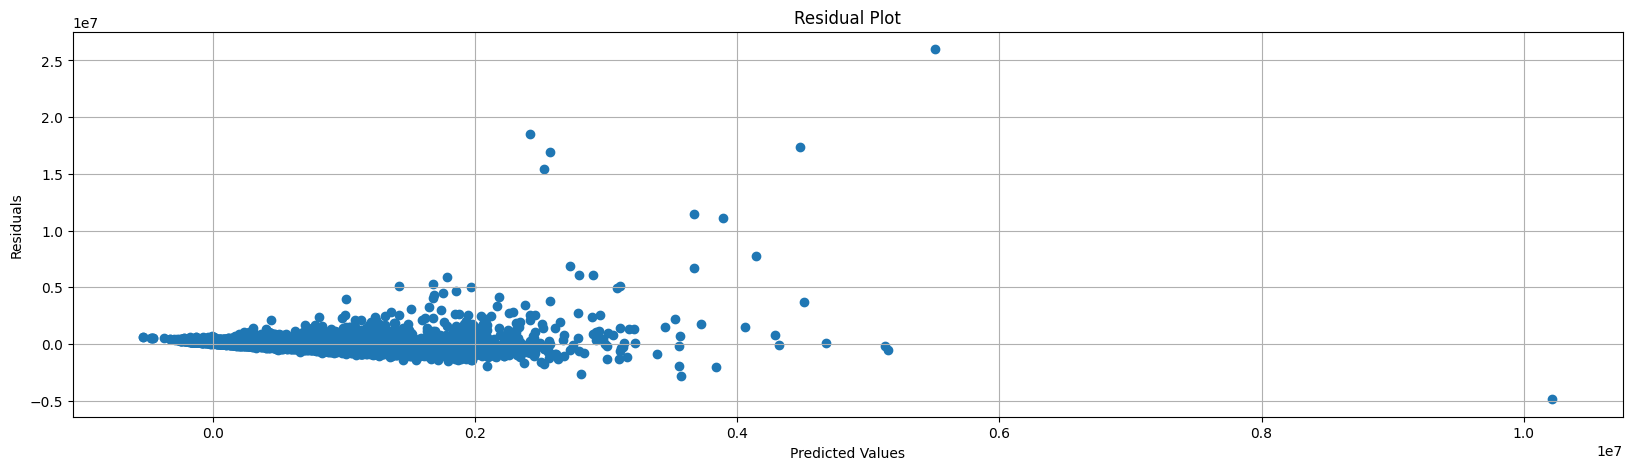

In [31]:
plt.scatter(y_estimates, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

**Question 7: (2 points)**: Calculate the error measures to determine how accurate our trained model is.
1. Create a variable called `me` and calculate the Mean Absolute Error.
2. Create a variable called `mse` and calculate the Mean Squared Error.
3. Create a variable called `rmse` and calculate the Root Mean Squared Error.
4. Create a variable called `r_squared` and calculate the R-squared value.
5. Print the results of those calculations in an f-string.

In [33]:
me = mean_absolute_error(y_test, y_estimates)

mse = mean_squared_error(y_test, y_estimates, squared=True)

rmse = mean_squared_error(y_test, y_estimates, squared=False)

r_squared = lr.score(x_test, y_test)
print(f'ME = {me}')
print(f'MSE = {mse}')
print(f'RMSE = {rmse}')
print(f'R_squared = {r_squared}')

ME = 300024.2478787667
MSE = 496979245722.4264
RMSE = 704967.5494109119
R_squared = 0.4123388563612779


**Question 8: (2 points)**: Use the results of questions 6 and 7 to answer the following questions:
1. How well did your trained model predict the `y_test` values?
2. What data can be changed to improve the model?
  * Think of data reduction or dimension reduction.

**Answer the questions in a comment or a text block**

**Question 9: (2 points)**: Redo your data model depending on what you decided to do in question 8.
* If you decide to reduce your data, you will need to start with your `df` variable. Create a new dataframe called `reduced_df` and repeat the steps performed in questions 4-7, using the new dataframe.
* If you decide to reduce your dimensions, you will not need to create a new dataframe. You will repeat questions 4-7, removing the appropriate dimensions.
* You can do both.

**Question 10: (2points)**: Use the results of question 9 to answer the following questions:
1. How well did your trained model predict the `y_test` values?
2. Are there any other possible data changes that you could do?

**Answer the questions in a comment or a text block**